In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import cv2
import math
import time
from multiprocessing import Process,Manager,Pool

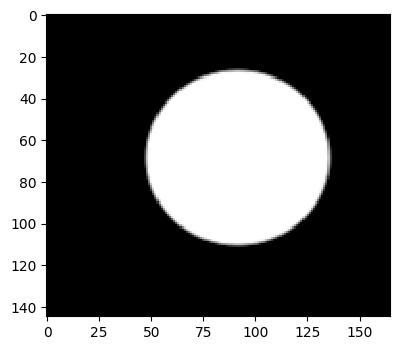

In [3]:
img = cv2.imread('icon.png')
plt.rcParams['figure.dpi'] = 100
plt.imshow(img)

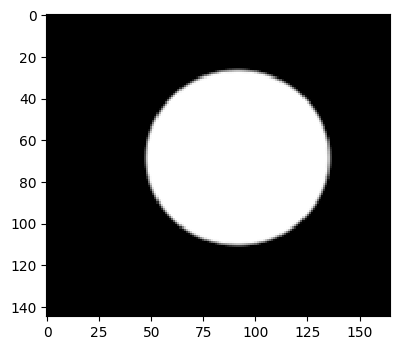

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.rcParams['figure.dpi'] = 100
plt.imshow(gray,cmap = 'gray')

(Text(0.5,1,'sobely'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

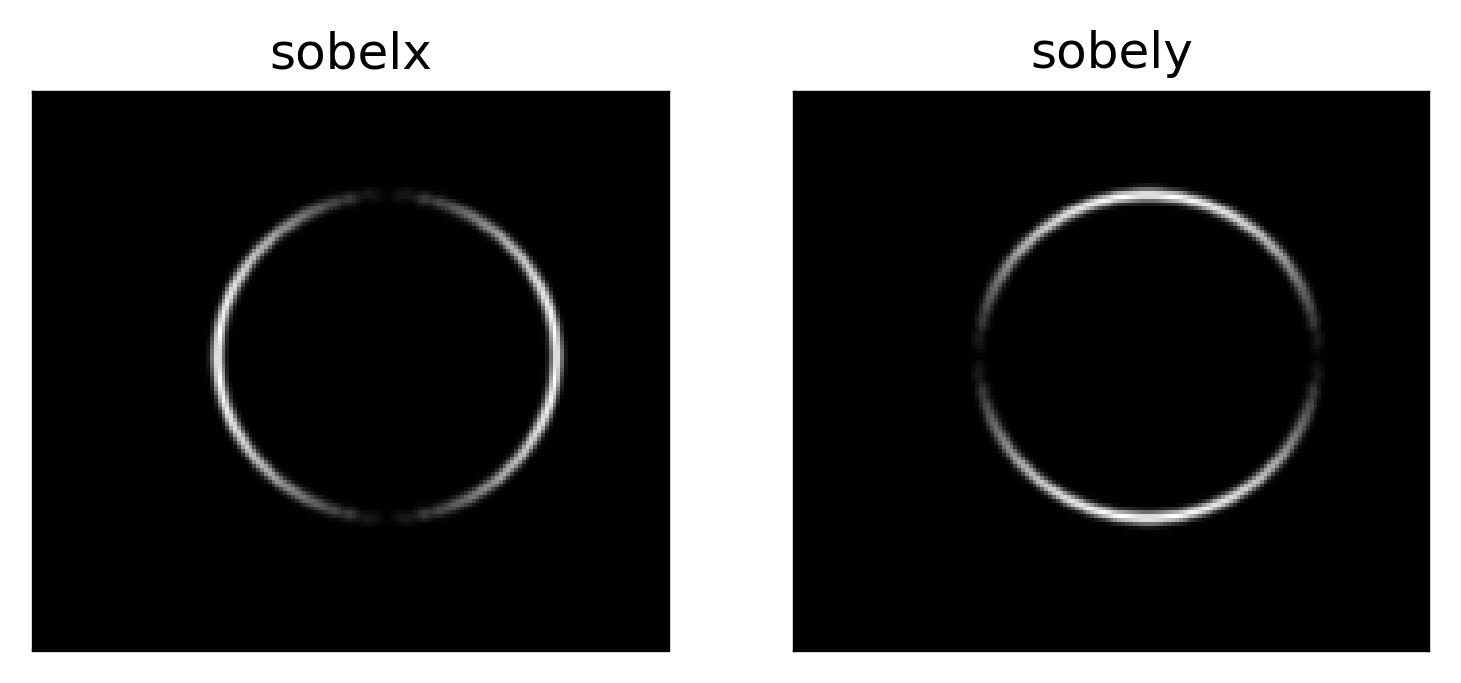

In [5]:
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
plt.rcParams['figure.dpi'] = 300
plt.subplot(1,2,1),plt.imshow( np.absolute(sobelx),cmap='gray')
plt.title('sobelx'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow( np.absolute(sobely),cmap='gray')
plt.title('sobely'), plt.xticks([]), plt.yticks([])

In [6]:
magni,angle = cv2.cartToPolar(sobelx,sobely)

In [7]:
h,w = magni.shape
h,w

(145, 165)

In [8]:
def default_weight(*args):
    return 1
def gauss_weight(y,x,center_y,center_x,sigma):
    s = 2*(sigma)**2
    index = -1*((x-center_x)**2+(y-center_y)**2)/s
    weight = math.exp(index)/(s*math.pi)
    return weight

In [9]:
delta = 30*math.pi/180

def voting_area(y,x,rmin=33,rmax=66,d=delta,weight=default_weight):
    init_area = np.zeros_like(angle)
    orient = angle[y][x]
    center_y = math.floor(y+((rmin+rmax)/2)*math.sin(orient))
    center_x = math.floor(x+((rmin+rmax)/2)*math.cos(orient))
    
    
    x_low = max(x-rmax,0)
    x_high = min(x+rmax,w)
    y_low = max(y-rmax,0)
    y_high = min(y+rmax,h)
    for i in range(x_low,x_high):
        for j in range(y_low,y_high):
            dist = (i-x)**2+(j-y)**2
            if dist > rmin**2 and dist < rmax**2:
                vec_angle = math.atan2(j-y,i-x) #atan2 return radians from -pi to pi
                if vec_angle <0 :
                    vec_angle += math.pi*2
                angle_diff = abs(vec_angle-orient)
                if  abs(vec_angle-orient)<= d  or abs(vec_angle-orient) >= 2*math.pi-d:
                    init_area[j][i] = 1*weight(j,i,center_y,center_x,16)
            else:
                continue
    return init_area

梯度方向: 357.515842896


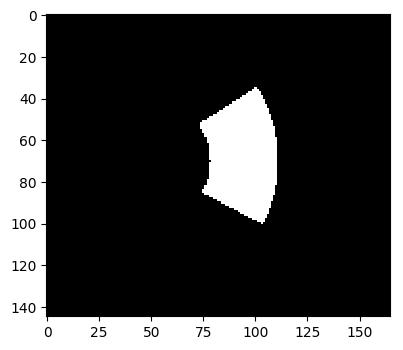

In [10]:
print('梯度方向:',angle[70][45]*180/math.pi)
test_voting = voting_area(70,45)
plt.rcParams['figure.dpi'] = 100
plt.imshow(test_voting,cmap = 'gray')

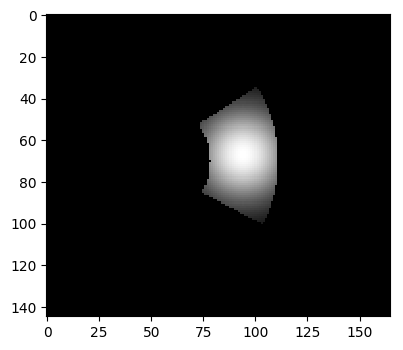

In [11]:
gauss_voting2 = voting_area(70,45,weight=gauss_weight)
plt.rcParams['figure.dpi'] = 100
plt.imshow(gauss_voting2,cmap = 'gray')

In [12]:
mean_th = magni.mean()

In [18]:
manager = Manager()
result_multi = manager.list()
def parallel_voting(result_list,j,i):
    result_multi.append(voting_area(j,i,weight=gauss_weight))
    return
pool = Pool(30)

start_time_n = time.time()
for i in range(w):
    for j in range(h):
        if magni[j][i] > mean_th:
            pool.apply_async(parallel_voting,args=(result_multi,j,i,))
pool.close()
pool.join()
end_time_n = time.time()
print(len(result_multi),end_time_n-start_time_n)

1548 4.68684720993042


In [13]:
start_time_1 = time.time() 
result = []
for i in range(w):
    for j in range(h):
        if magni[j][i] > mean_th:
            result.append(voting_area(j,i,weight=gauss_weight))
end_time_1 = time.time()
print(len(result),end_time_1-start_time_1)

1548 46.55193758010864


In [283]:
voting_map = np.copy(result[0])
for i in range(1,len(result)):
    voting_map += result[i]

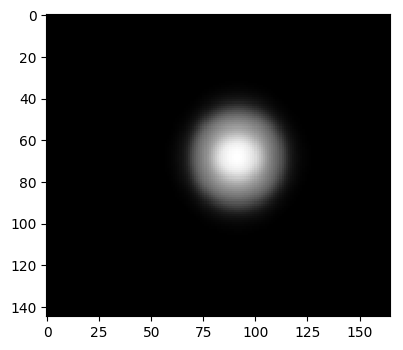

In [284]:
plt.rcParams['figure.dpi'] = 100
plt.imshow(voting_map,cmap = 'gray')

In [182]:
point = [71,75]
math.atan2(71-70,75-45)

0.033320995878247196

In [172]:
flag = 0
for i in range(0,w):
    if flag>10:
        break
    for j in range(0,h):
        if flag> 10:
            break
        if magni[j][i] > mean_th:
            print(angle[j][i],j,i)
            flag = 1

0.269475251436 64 45
0.148129880428 65 45
0.081190072 66 45
0.0433567017317 67 45
0.0139756407589 68 45
6.26920938492 69 45
6.23982858658 70 45
6.20079660416 71 45
6.13149356842 72 45
6.01044940948 73 45
0.47242680192 58 46
0.312175035477 59 46
0.187806800008 60 46
0.127920016646 61 46
0.151395961642 62 46
0.194514989853 63 46
0.178190544248 64 46
0.124253332615 65 46
0.0777353569865 66 46
0.0440948605537 67 46
0.0145163657144 68 46
6.26866912842 69 46
6.23888397217 70 46
6.20408010483 71 46
6.15662336349 72 46
6.10474920273 73 46
6.09116315842 74 46
6.13340711594 75 46
6.15526533127 76 46
6.0953783989 77 46
5.97101020813 78 46
5.8107585907 79 46
0.45770123601 55 47
0.324898481369 56 47
0.296254396439 57 47
0.313969343901 58 47
0.281719923019 59 47
0.203858628869 60 47
0.134383052588 61 47
0.112490072846 62 47
0.127601832151 63 47
0.13128259778 64 47
0.107512146235 65 47
0.0759804993868 66 47
0.0458412989974 67 47
0.0154372761026 68 47
6.26774787903 69 47
6.23693943024 70 47
6.20572519

1.7825782299 29 103
1.83440935612 30 103
4.44877576828 107 103
4.5006070137 108 103
4.51089096069 109 103
4.49159288406 110 103
4.42249202728 111 103
1.8152654171 26 104
1.79559516907 27 104
1.81060886383 28 104
1.84546864033 29 104
1.90432786942 30 104
2.00281572342 31 104
4.28036975861 106 104
4.37885713577 107 104
4.43771648407 108 104
4.47257661819 109 104
4.48758983612 110 104
4.46791982651 111 104
1.87507200241 26 105
1.8734177351 27 105
1.87717938423 28 105
1.88525784016 29 105
1.9009462595 30 105
1.93793308735 31 105
4.34525203705 106 105
4.3822388649 107 105
4.39792728424 108 105
4.40600585938 109 105
4.40976762772 110 105
4.40811300278 111 105
2.0369181633 26 106
1.94239151478 27 106
1.89551377296 28 106
1.87773287296 29 106
1.88713800907 30 106
1.93983304501 31 106
4.34335184097 106 106
4.39604711533 107 106
4.40545225143 108 106
4.38767147064 109 106
4.34079360962 110 106
4.24626684189 111 106
1.93958926201 27 107
1.88863551617 28 107
1.88659739494 29 107
1.91100001335 30 1

3.09210658073 67 135
3.12447667122 68 135
3.15870857239 69 135
3.19166946411 70 135
3.21934437752 71 135
3.23701858521 72 135
3.24213886261 73 135
3.23895311356 74 135
3.25014042854 75 135
3.29797935486 76 135
3.3645658493 77 135
3.40171527863 78 135
3.39347553253 79 135
3.39516282082 80 135
3.45592856407 81 135
3.52713179588 82 135
3.54389810562 83 135
3.56290364265 84 135
3.67552089691 85 135
2.68384695053 55 136
2.81824278831 56 136
2.84681797028 57 136
2.82682776451 58 136
2.85837864876 59 136
2.93814325333 60 136
3.00889921188 61 136
3.03005385399 62 136
3.01411938667 63 136
3.01030993462 64 136
3.03408050537 65 136
3.06561207771 66 136
3.09575128555 67 136
3.12615537643 68 136
3.15702986717 69 136
3.1878387928 70 136
3.21844506264 71 136
3.24924015999 72 136
3.2721221447 73 136
3.26876807213 74 136
3.25394654274 75 136
3.27562975883 76 136
3.34525156021 77 136
3.42348694801 78 136
3.45537042618 79 136
3.43636727333 80 136
3.46494245529 81 136
3.59933829308 82 136
2.66810512543 58

In [241]:
((30-1)*0.5-1)*0.3+0.8

4.85

In [245]:
print('梯度方向:',angle[70][45]*180/math.pi)
center_y = 70 + 49.5*math.sin(angle[70][45])
center_x = 45 + 49.5*math.cos(angle[70][45])
print(center_y,center_x)

梯度方向: 357.515842896
67.85451466010973 94.45348210850594
